<a href="https://colab.research.google.com/github/gombaniro/topic-discovery/blob/main/Topic_descovery_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Topic Discovery
##### Problem statement background
** **
Develop a topic modeling solution to automatically identify and categorize the underlying topics in a large collection of scientific papers.
The goal is to facilitate better organization, retrieval, and analysis of scientific literature, enabling researchers to quickly
find relevant papers and identify emerging trends in their fields.:

1. **Identify Topics**: Automatically identify and label distinct topics across the collection of papers.
2. **Categorize Papers**: Assign each paper to one or more topics based on its content.
3. **Trend Analysis**: Analyze the distribution of topics over time to identify emerging trends and shifts in research focus.
4. **Search and Retrieval**: Enhance the search and retrieval process by allowing users to find papers based on topics

#### Requirements
** **

1. **Dataset Preprocessing**:
   - Preprocess the text of scientific papers to clean and standardize the content (e.g., removing stop words, stemming/lemmatization, handling special characters).
   - Extract text features from papers title, abstract and main content.

2. **Model Development**:
   - Choose an appropriate topic modeling algorithm (e.g., Latent Dirichlet Allocation (LDA),
   -  Non-Negative Matrix Factorization (NMF),
   -  Advanced neural network-based approaches like BERTopic).
   - Optimize the number of topics and model parameters to balance interpretability and accuracy.

3. **Evaluation Metrics**:
   - Use metrics such as coherence score, perplexity, and human evaluation to assess the quality and coherence of the identified topics.
   - Validate the model effectiveness in categorizing papers by comparing it with existing classification systems (e.g., journal categories).

4. **Implementation**:
   - Develop python scripts and explore topics and retrieve relevant papers.
   - Implement visualization tools (e.g., topic distribution over time, word clouds) to help users understand and interpret the topics.

5. **Scalability and Performance**:
   - Ensure the solution can handle large datasets and provide results within a reasonable time frame.
   - Consider cloud-based or distributed computing solutions to manage computational demands.

### Approach Overview
LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

We describe the generative process of LDA as, given the M number of documents, N number of words, and prior K number of topics, the model trains to output:

- `psi`, the distribution of words for each topic K
- `phi`, the distribution of topics for each document i

#### Parameters of LDA

- `Alpha parameter` is Dirichlet prior concentration parameter that represents document
-  topic density  with a higher alpha, documents are assumed to be made up of more topics and result in more specific topic distribution per document.
- `Beta parameter` is the same prior concentration parameter that represents topic
-  Word density  with high beta, topics are assumed to made of up most of the words and result in a more specific word distribution per topic.



** **
### LDA Implementation

1. [Loading data](#load_data)
2. [Data cleaning](#clean_data)
3. [Exploratory analysis](#eda)
4. [Prepare data for LDA analysis](#data_preparation)
5. [LDA model training](#train_model)
6. [Analyzing LDA model results](#results)

** **
We’ll use the dataset of papers published in NeurIPS (NIPS) conference which is one of the most prestigious yearly events in the machine learning community. The CSV data file contains information on the different NeurIPS papers that were published from 1987 until 2016 (29 years!). These papers discuss a wide variety of topics in machine learning, from neural networks to optimization methods, and many more.

<img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_158/img/nips_logo.png" alt="The logo of NIPS (Neural Information Processing Systems)">

Let’s start by looking at the content of the file

** **
#### Step 1: Loading Data <a class="anchor\" id="load_data"></a>
** **
For this project, we’ll use the dataset of papers published in NeurIPS (NIPS) conference which is one of the most prestigious yearly events in the machine learning community. The CSV data file contains information on the different NeurIPS papers that were published from 1987 until 2016 (29 years!). These papers discuss a wide variety of topics in machine learning, from neural networks to optimization methods, and many more.

Let’s start by looking at the content of the file

In [1]:
import zipfile
import pandas as pd
import os

# Open the zip file
with zipfile.ZipFile("/Users/gombaniro/learn-machine-learning/finalProject/topic-discovery/topic-modeling/data/NIPS Papers.zip", "r") as zip_ref:
    # Extract the file to a temporary directory
    zip_ref.extractall("/Users/gombaniro/learn-machine-learning/finalProject/topic-discovery/topic-modeling/temp")

# Read the CSV file into a pandas DataFrame
papers = pd.read_csv("/Users/gombaniro/learn-machine-learning/finalProject/topic-discovery/topic-modeling/temp/NIPS Papers/papers.csv")

# Print head
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


** **
#### Step 2: Data Cleaning <a class="anchor\" id="clean_data"></a>
** **

Since the goal of this analysis is to perform topic modeling, let's focus only on the text data from each paper, and drop other metadata columns.

In [2]:
# Remove the columns
# papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


##### Remove punctuation/lower casing

Next, let’s perform a simple preprocessing on the content of `paper_text` column to make them more amenable for analysis, and reliable results. To do that, we’ll use a regular expression to remove any punctuation, and then lowercase the text

In [3]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

0    767\n\nself-organization of associative databa...
1    683\n\na mean field theory of layer iv of visu...
2    394\n\nstoring covariance by the associative\n...
3    bayesian query construction for neural\nnetwor...
4    neural network ensembles cross\nvalidation and...
Name: paper_text_processed, dtype: object

** **
#### Step 3: Exploratory Analysis <a class="anchor\" id="eda"></a>
** **

To verify whether the preprocessing, we’ll make a simple word cloud using the `wordcloud` package to get a visual representation of most common words. It is key to understanding the data and ensuring we are on the right track, and if any more preprocessing is necessary before training the model.

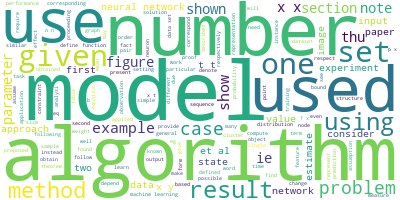

In [4]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

** **
#### Step 4: Prepare text for LDA analysis <a class="anchor\" id="data_preparation"></a>
** **

Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.

In [5]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:3][0][:30])
print("Done Precessoing")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gombaniro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['self', 'organization', 'associative', 'database', 'applications', 'hisashi', 'suzuki', 'suguru', 'arimoto', 'osaka', 'university', 'toyonaka', 'osaka', 'japan', 'abstract', 'efficient', 'method', 'self', 'organizing', 'associative', 'databases', 'proposed', 'together', 'applications', 'robot', 'eyesight', 'systems', 'proposed', 'databases', 'associate']
Done Precessoing


In [6]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])
print(len(corpus))

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 6), (6, 1), (7, 1), (8, 3), (9, 1), (10, 2), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 4), (18, 8), (19, 1), (20, 1), (21, 2), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]
6560


** **
#### Step 5: LDA model tranining <a class="anchor\" id="train_model"></a>
** **

we keep all the parameters to default except for inputting the number of topics. For this project, we will build a model with 10 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic.

In [7]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
print("Done train LDA model")

[(0,
  '0.005*"time" + 0.005*"learning" + 0.005*"model" + 0.005*"function" + '
  '0.004*"set" + 0.004*"data" + 0.004*"one" + 0.004*"algorithm" + 0.003*"two" '
  '+ 0.003*"figure"'),
 (1,
  '0.006*"learning" + 0.006*"model" + 0.006*"algorithm" + 0.006*"data" + '
  '0.005*"set" + 0.004*"function" + 0.004*"number" + 0.004*"using" + '
  '0.004*"figure" + 0.004*"two"'),
 (2,
  '0.006*"learning" + 0.005*"model" + 0.005*"data" + 0.005*"set" + '
  '0.004*"algorithm" + 0.004*"using" + 0.004*"one" + 0.004*"problem" + '
  '0.004*"training" + 0.004*"two"'),
 (3,
  '0.010*"model" + 0.007*"data" + 0.006*"learning" + 0.004*"training" + '
  '0.004*"algorithm" + 0.004*"set" + 0.004*"using" + 0.004*"one" + '
  '0.004*"models" + 0.003*"figure"'),
 (4,
  '0.006*"learning" + 0.005*"model" + 0.005*"algorithm" + 0.005*"data" + '
  '0.005*"using" + 0.004*"set" + 0.003*"time" + 0.003*"number" + '
  '0.003*"function" + 0.003*"models"'),
 (5,
  '0.007*"learning" + 0.006*"data" + 0.005*"algorithm" + 0.005*"model"

** **
#### Step 6: Analyzing our LDA model <a class="anchor\" id="results"></a>
** **

Now that we have a trained model let’s visualize the topics for interpretability. To do so, we’ll use a popular visualization package, pyLDAvis which is designed to help interactively with:

1. Better understanding and interpreting individual topics, and
2. Better understanding the relationships between the topics.

For (1), you can manually select each topic to view its top most frequent and/or “relevant” terms, using different values of the λ parameter. This can help when you’re trying to assign a human interpretable name or “meaning” to each topic.

For (2), exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics.

In [ ]:
#!pip install pyLDAvis gensim

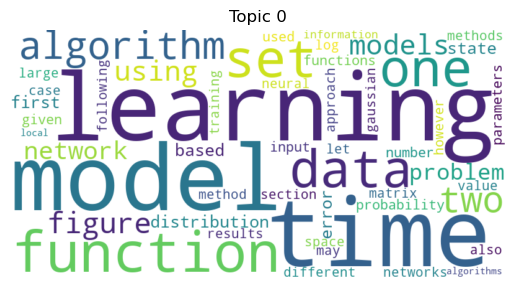

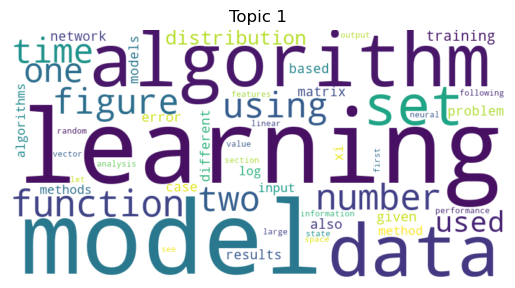

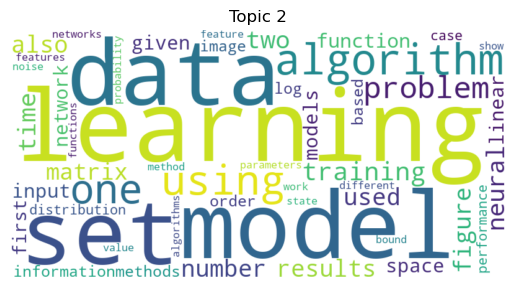

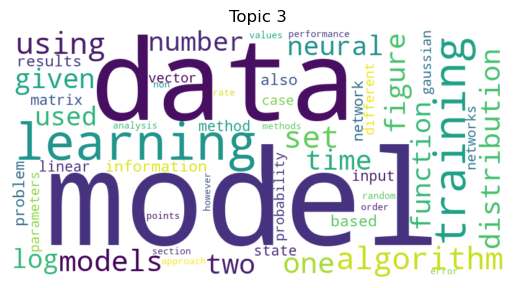

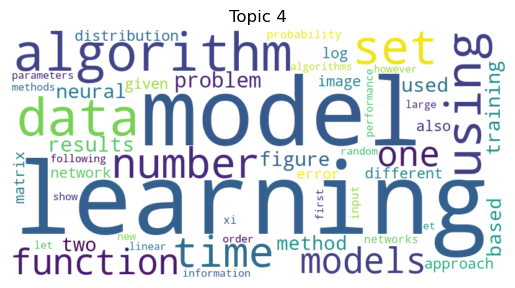

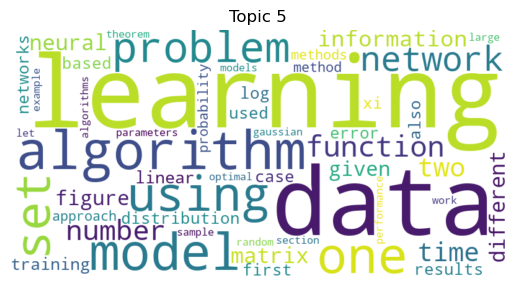

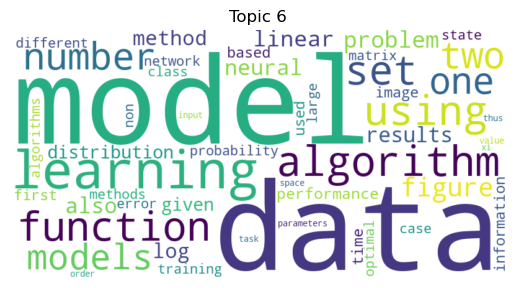

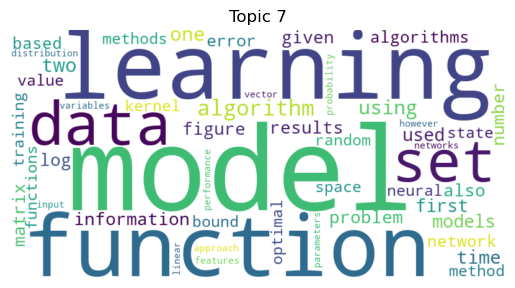

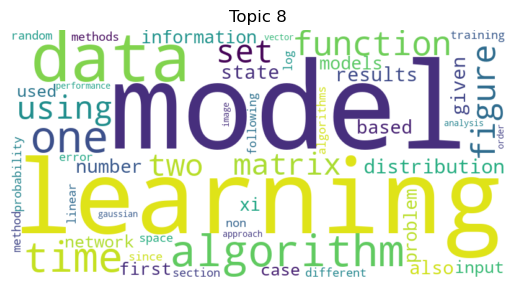

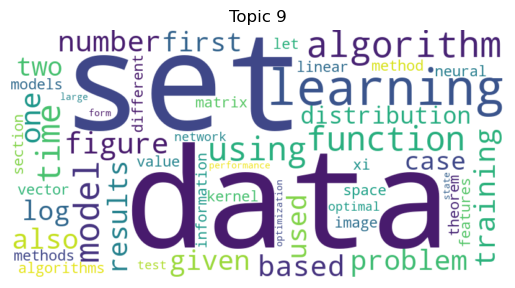

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud for each topic
def plot_word_cloud(model, num_topics):
    for topic_id in range(num_topics):
        plt.figure()
        topic = dict(model.show_topic(topic_id, 50))  # Get the top 20 words for this topic
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Topic {topic_id}')
        plt.show()

# Plot the word clouds
plot_word_cloud(lda_model, num_topics)

In [9]:
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('/Users/gombaniro/learn-machine-learning/finalProject/topic-discovery/topic-modeling/results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, '/Users/gombaniro/learn-machine-learning/finalProject/topic-discovery/topic-modeling/results/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.000899  0.001749       1        1  12.755733
3      0.005264 -0.003866       2        1  12.478329
0      0.003122  0.005794       3        1  11.759651
6     -0.001455 -0.001696       4        1  10.231996
4     -0.000071 -0.002398       5        1  10.172124
5     -0.000877  0.001704       6        1   9.240099
9     -0.005374 -0.000132       7        1   8.974325
8      0.001313 -0.000241       8        1   8.736570
2      0.000902  0.000191       9        1   8.109603
1     -0.001927 -0.001105      10        1   7.541570, topic_info=           Term          Freq         Total Category  logprob  loglift
18    algorithm  70447.000000  70447.000000  Default  30.0000  30.0000
870          xi  26526.000000  26526.000000  Default  29.0000  29.0000
170        data  83279.000000  83279.000000  Default  28.0000  28.0000
479       model  92714.000000  92714.000000  Default  27.0000  27.0000
803    training  41112.000000  41112.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
1102     matrix   2496.244461  36993.235205  Topic10  -6.1248  -0.1112
1212    results   2566.587066  39717.557453  Topic10  -6.0970  -0.1545
1115     models   2477.525498  42660.046843  Topic10  -6.1323  -0.2613
2664        log   2306.622458  35508.145889  Topic10  -6.2038  -0.1492
471      method   2253.966045  32130.586090  Topic10  -6.2269  -0.0724

[926 rows x 6 columns], token_table=        Topic      Freq  Term
term                         
138995      1  0.103687  absx
138995      2  0.414747  absx
138995      3  0.103687  absx
138995      4  0.103687  absx
138995      8  0.103687  absx
...       ...       ...   ...
9124        6  0.124594    zt
9124        7  0.077310    zt
9124        8  0.167045    zt
9124        9  0.067992    zt
9124       10  0.066266    zt

[4676 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 1, 7, 5, 6, 10, 9, 3, 2])

In [10]:

# Train the model on the corpus.

from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
nmf_model = gensim.models.Nmf(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(nmf_model.print_topics())
doc_nmf = nmf_model[corpus]

/opt/anaconda3/lib/python3.11/site-packages/gensim/models/nmf.py:578: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.11/site-packages/gensim/models/nmf.py:607: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.11/site-packages/gensim/models/nmf.py:620: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.11/site-packages/gensim/models/nmf.py:620: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matri

[(0,
  '0.012*"image" + 0.008*"noise" + 0.007*"time" + 0.007*"figure" + '
  '0.006*"visual" + 0.006*"response" + 0.006*"stimulus" + 0.005*"spike" + '
  '0.005*"information" + 0.005*"images"'),
 (1,
  '0.020*"training" + 0.013*"set" + 0.009*"classification" + 0.008*"data" + '
  '0.007*"examples" + 0.007*"using" + 0.006*"test" + 0.006*"features" + '
  '0.006*"class" + 0.005*"loss"'),
 (2,
  '0.025*"algorithm" + 0.012*"learning" + 0.011*"xt" + 0.011*"time" + '
  '0.009*"regret" + 0.009*"algorithms" + 0.007*"log" + 0.007*"bound" + '
  '0.006*"online" + 0.005*"stochastic"'),
 (3,
  '0.022*"data" + 0.015*"model" + 0.009*"distribution" + 0.009*"models" + '
  '0.007*"gaussian" + 0.006*"using" + 0.005*"inference" + 0.005*"set" + '
  '0.005*"likelihood" + 0.005*"log"'),
 (4,
  '0.041*"learning" + 0.019*"function" + 0.011*"image" + 0.007*"images" + '
  '0.007*"functions" + 0.007*"policy" + 0.006*"task" + 0.005*"using" + '
  '0.005*"value" + 0.005*"reward"'),
 (5,
  '0.010*"algorithm" + 0.009*"pro

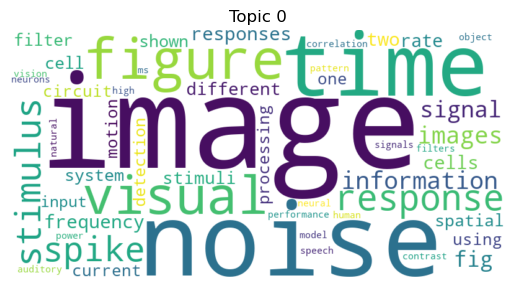

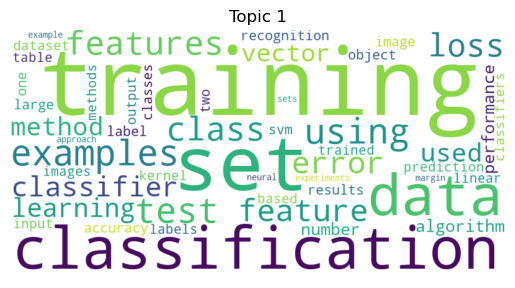

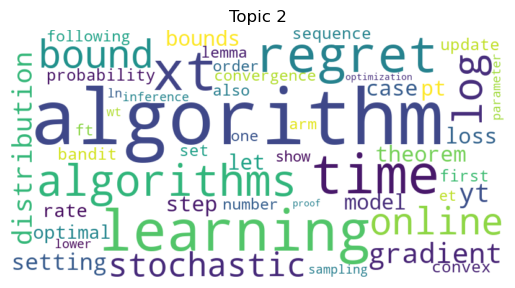

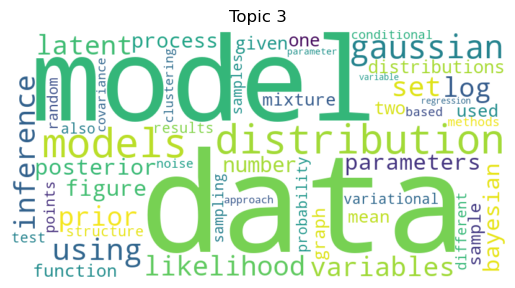

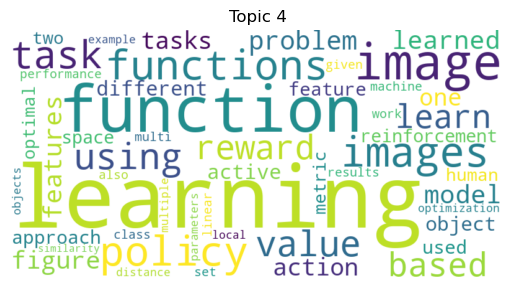

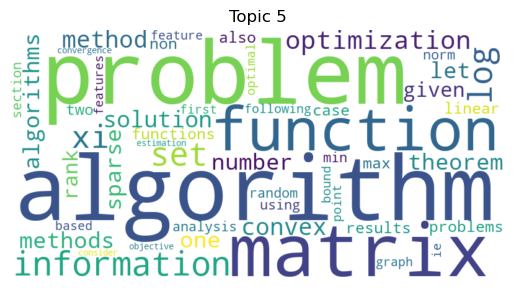

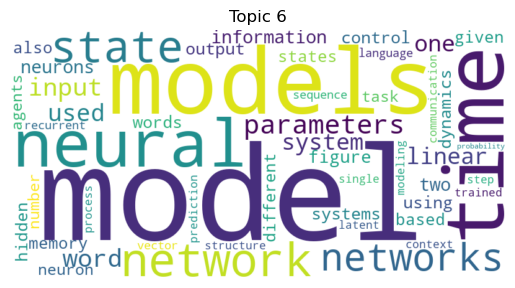

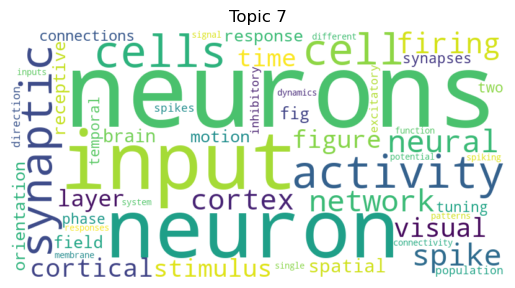

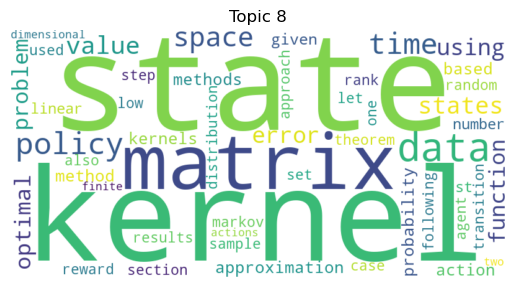

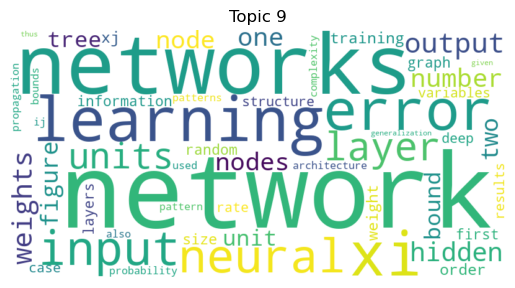

In [11]:
# Plot the word clouds
plot_word_cloud(nmf_model, num_topics)


In [12]:
#  preprocessing for bertopic function
def bert_preprocess(tokens):
    return ' '.join(tokens)

# Apply preprocessing to all documents
docs = [bert_preprocess(doc) for doc in data_words]

len(docs)
len(data_words)
print("Done Preprocessing for bert")

Done Preprocessing for bert


In [14]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 4.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1


In [20]:
from bertopic import BERTopic

topic_model = BERTopic(nr_topics = 10)
topics, probs = topic_model.fit_transform(docs)
print("Done train BERT model")

/opt/anaconda3/lib/python3.11/site-packages/hdbscan/hdbscan_.py:1170: DeprecationWarning:

`alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.



Done train BERT model


In [21]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2006,-1_model_data_learning_set,"[model, data, learning, set, using, one, netwo...",[prediction spike data using kernel algorithms...
1,0,3255,0_algorithm_learning_data_set,"[algorithm, learning, data, set, function, mod...",[parallelized stochastic gradient descent mark...
2,1,621,1_model_neurons_spike_time,"[model, neurons, spike, time, figure, data, ne...",[probabilistic computation spiking populations...
3,2,406,2_image_images_object_model,"[image, images, object, model, training, learn...",[image retrieval classification using local di...
4,3,121,3_ranking_privacy_model_data,"[ranking, privacy, model, data, algorithm, ite...",[probabilistic choose models classification ra...
5,4,72,4_model_protein_data_patients,"[model, protein, data, patients, time, patient...",[non parametric learning method confidently es...
6,5,30,5_causal_variables_graph_model,"[causal, variables, graph, model, data, models...",[probabilistic latent variable models distingu...
7,6,20,6_hashing_hash_binary_codes,"[hashing, hash, binary, codes, bits, lsh, data...",[optimizing affinity based binary hashing usin...
8,7,17,7_music_musical_songs_notes,"[music, musical, songs, notes, harmonic, note,...",[name song probabilistic approach querying mus...
9,8,12,8_ba_wv_rts_yx,"[ba, wv, rts, yx, fe, ih, nm, wyx, cb, xw]",[dgoqprfqsut wx yz bdcfehg ikjmlxconij prqcs p...


In [24]:
topic_model.get_topic(0)

[('algorithm', 0.018950343923574708),
 ('learning', 0.018586892337209955),
 ('data', 0.01530807306513905),
 ('set', 0.015103650219599847),
 ('function', 0.01505695223808355),
 ('model', 0.013554264524275762),
 ('problem', 0.013287841733910571),
 ('using', 0.0128157799651336),
 ('one', 0.012527153451577436),
 ('time', 0.011877753805997393)]

In [23]:
topic_model.get_document_info(docs)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,self organization associative database applica...,-1,-1_model_data_learning_set,"[model, data, learning, set, using, one, netwo...",[prediction spike data using kernel algorithms...,model - data - learning - set - using - one - ...,0.000000,False
1,mean field theory layer iv visual cortex appli...,1,1_model_neurons_spike_time,"[model, neurons, spike, time, figure, data, ne...",[probabilistic computation spiking populations...,model - neurons - spike - time - figure - data...,0.878458,False
2,storing covariance associative longterm potent...,-1,-1_model_data_learning_set,"[model, data, learning, set, using, one, netwo...",[prediction spike data using kernel algorithms...,model - data - learning - set - using - one - ...,0.000000,False
3,bayesian query construction neural network mod...,0,0_algorithm_learning_data_set,"[algorithm, learning, data, set, function, mod...",[parallelized stochastic gradient descent mark...,algorithm - learning - data - set - function -...,0.960897,False
4,neural network ensembles cross validation acti...,-1,-1_model_data_learning_set,"[model, data, learning, set, using, one, netwo...",[prediction spike data using kernel algorithms...,model - data - learning - set - using - one - ...,0.000000,False
...,...,...,...,...,...,...,...,...
6555,single transistor learning synapses paul hasle...,0,0_algorithm_learning_data_set,"[algorithm, learning, data, set, function, mod...",[parallelized stochastic gradient descent mark...,algorithm - learning - data - set - function -...,0.687832,False
6556,bias variance combination least squares estima...,-1,-1_model_data_learning_set,"[model, data, learning, set, using, one, netwo...",[prediction spike data using kernel algorithms...,model - data - learning - set - using - one - ...,0.000000,False
6557,real time clustering cmos neural engine serran...,0,0_algorithm_learning_data_set,"[algorithm, learning, data, set, function, mod...",[parallelized stochastic gradient descent mark...,algorithm - learning - data - set - function -...,1.000000,False
6558,learning direction global motion two classes m...,1,1_model_neurons_spike_time,"[model, neurons, spike, time, figure, data, ne...",[probabilistic computation spiking populations...,model - neurons - spike - time - figure - data...,1.000000,False


/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



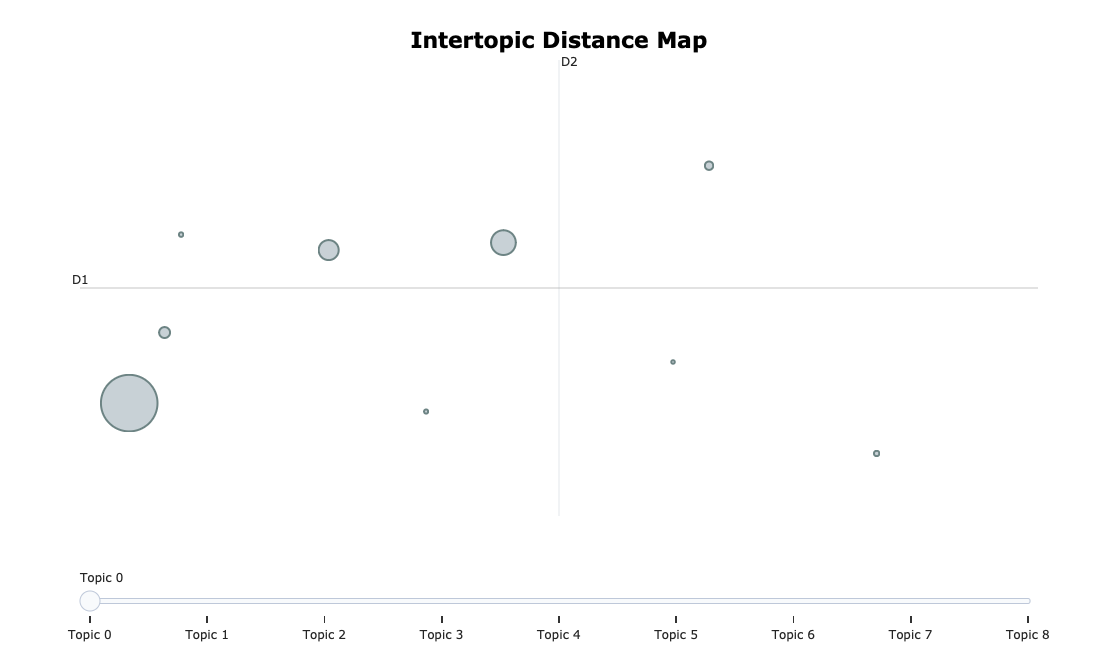

In [25]:
topic_model.visualize_topics()

### Fine-tune your topic representations

In [ ]:
from bertopic.representation import KeyBERTInspired

# Fine-tune your topic representations
representation_model = KeyBERTInspired()
topic_model = BERTopic(representation_model=representation_model)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



** **
#### Conclusion
Machine learning has become increasingly popular over the past decade, and recent advances in computational availability have led to exponential growth to people looking for ways how new methods can be incorporated to advance the field of Natural Language Processing.

** **
#### References:
1. Topic model — Wikipedia. https://en.wikipedia.org/wiki/Topic_model
2. Distributed Strategies for Topic Modeling. https://www.ideals.illinois.edu/bitstream/handle/2142/46405/ParallelTopicModels.pdf?sequence=2&isAllowed=y
3. Topic Mapping — Software — Resources — Amaral Lab. https://amaral.northwestern.edu/resources/software/topic-mapping
4. A Survey of Topic Modeling in Text Mining. https://thesai.org/Downloads/Volume6No1/Paper_21-A_Survey_of_Topic_Modeling_in_Text_Mining.pdf
